<a href="https://colab.research.google.com/github/lorduwahz/Data-Science/blob/main/Predicting_House_Prices_In_Nigeria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [248]:
import pandas as pd
import numpy as np
import seaborn as sns

In [249]:
df = pd.read_csv('https://raw.githubusercontent.com/The-Gradient-Boost/datasets/master/Datasets/NigeriaHousingPrices/findnigprop.csv', delimiter=',')
type(df)

pandas.core.frame.DataFrame

In [250]:
df

,price,unit,location,bedrooms,baths,state
0,"₦2,620,000.00 Per Year","₦2,620,000.00 Per Year",", 7 obasa street, Oba-Akran, Ikeja, Lagos, Nig...",NaN,NaN,NaN
1,"₦2,500,000.00","₦2,500,000.00",", Tudu wada, Karshi,, Karu, Nasaruwa, Nigeria",NaN,NaN,NaN
2,"₦300,000.00","₦300,000.00",", ukeh, masaka, mararba, Karu, Nasaruwa, Nigeria",NaN,NaN,NaN
3,per month,per month,", World Trade Center Commercial Tower, Plot 11...",NaN,NaN,NaN
4,,,", World Trade Center, Plot 1113, Constitution ...",2.0,NaN,NaN
...,...,...,...,...,...,...
747,,,", Adedoyin Ogungbe Crescent, Lekki Phase 1, La...",NaN,NaN,NaN
748,"₦4,000,000.00 per month","₦4,000,000.00 per month",", Allen Avenue, Ikeja, Lagos, Nigeria",NaN,NaN,NaN
749,"₦200,000,000.00","₦200,000,000.00",", ALABA INTERNATIONAL MARKET;IGBEDE ROAD..., O...",NaN,NaN,NaN
750,"₦27,500.00 Per Year","₦27,500.00 Per Year",", Awolowo Road, Nigeria",NaN,NaN,NaN


Assessing the data, I discovered that there are houses with 0 and NaN bedrooms. I decided to retain anly appartments that have 1 or more bedrooms

In [251]:
new_df = df[df['bedrooms'] > 0]

In [252]:
new_df

,price,unit,location,bedrooms,baths,state
4,,,", World Trade Center, Plot 1113, Constitution ...",2.0,NaN,NaN
5,,,", World Trade Center, Plot 1113, Constitution ...",1.0,NaN,NaN
6,,,", World Trade Center, Plot 1113, Constitution ...",3.0,NaN,NaN
8,"₦33,000,000.00","₦33,000,000.00",", Alafia Bus stop, Badagry Express Way, Lagos,...",5.0,5f,NaN
9,"₦30,000,000.00","₦30,000,000.00",", Alafia Bus stop, Badagry Express Way, Lagos,...",8.0,7f,NaN
...,...,...,...,...,...,...
685,"₦4,000,000.00 Per Year","₦4,000,000.00 Per Year",", Femi Okunnu Estate, Nigeria",4.0,0f,NaN
686,"₦70,000,000.00 Per Year","₦70,000,000.00 Per Year",", Oniru, Nigeria",4.0,0f,NaN
691,"₦20,000,000.00","₦20,000,000.00",", Peace Estate, Federal Govt. housing scheme, ...",4.0,0f,NaN
730,"₦5,500,000.00 per month","₦5,500,000.00 per month",", Lekki phase 1, Lekki Phase 1, Lagos, Nigeria",5.0,0f,NaN


Dropping the states and baths from the dataset was necessary because they offer no direct information as to how we can properly understand theis dataset. They are also not required for our regression analysis later on.

In [253]:
data = new_df.drop(columns=['baths', 'state'])
data

,price,unit,location,bedrooms
4,,,", World Trade Center, Plot 1113, Constitution ...",2.0
5,,,", World Trade Center, Plot 1113, Constitution ...",1.0
6,,,", World Trade Center, Plot 1113, Constitution ...",3.0
8,"₦33,000,000.00","₦33,000,000.00",", Alafia Bus stop, Badagry Express Way, Lagos,...",5.0
9,"₦30,000,000.00","₦30,000,000.00",", Alafia Bus stop, Badagry Express Way, Lagos,...",8.0
...,...,...,...,...
685,"₦4,000,000.00 Per Year","₦4,000,000.00 Per Year",", Femi Okunnu Estate, Nigeria",4.0
686,"₦70,000,000.00 Per Year","₦70,000,000.00 Per Year",", Oniru, Nigeria",4.0
691,"₦20,000,000.00","₦20,000,000.00",", Peace Estate, Federal Govt. housing scheme, ...",4.0
730,"₦5,500,000.00 per month","₦5,500,000.00 per month",", Lekki phase 1, Lekki Phase 1, Lagos, Nigeria",5.0


The dataset still contains some empty strings in the two of our most useful columns. This means the rows housing these empty strings are also not useful. The empty string was replaced with numpy's NaN and subsequently dropped from our dataset.

In [254]:
data.apply(str)
data.replace(' ', np.nan, inplace=True)

In [255]:
data.dropna(subset=['price', 'unit'], inplace=True)

In [256]:
data

,price,unit,location,bedrooms
8,"₦33,000,000.00","₦33,000,000.00",", Alafia Bus stop, Badagry Express Way, Lagos,...",5.0
9,"₦30,000,000.00","₦30,000,000.00",", Alafia Bus stop, Badagry Express Way, Lagos,...",8.0
10,"₦3,750,000.00 Per Year","₦3,750,000.00 Per Year",", jabi by eco bank, Jabi, Abuja FCT, Nigeria",3.0
11,"₦40,000,000.00","₦40,000,000.00",", Alafia Bus stop, Badagry Express Way, Lagos,...",5.0
12,"₦150,000,000.00","₦150,000,000.00",", Oduduwa Crescent, Nigeria",4.0
...,...,...,...,...
685,"₦4,000,000.00 Per Year","₦4,000,000.00 Per Year",", Femi Okunnu Estate, Nigeria",4.0
686,"₦70,000,000.00 Per Year","₦70,000,000.00 Per Year",", Oniru, Nigeria",4.0
691,"₦20,000,000.00","₦20,000,000.00",", Peace Estate, Federal Govt. housing scheme, ...",4.0
730,"₦5,500,000.00 per month","₦5,500,000.00 per month",", Lekki phase 1, Lekki Phase 1, Lagos, Nigeria",5.0


In [257]:
data['price'] = data['price'].str.strip().str.replace(',', '').str.replace(
    'Per Year', '').str.replace('per month', '').str.replace(
        'Per day', '').str.replace(' ', '')
data['price']

8       ₦33000000.00
9       ₦30000000.00
10       ₦3750000.00
11      ₦40000000.00
12     ₦150000000.00
           ...      
685      ₦4000000.00
686     ₦70000000.00
691     ₦20000000.00
730      ₦5500000.00
731         $2500000
Name: price, Length: 406, dtype: object

In [258]:
data.replace('', np.nan, inplace=True)

In [259]:
data.dropna(subset=['price'], inplace=True)

In [260]:
data

,price,unit,location,bedrooms
8,₦33000000.00,"₦33,000,000.00",", Alafia Bus stop, Badagry Express Way, Lagos,...",5.0
9,₦30000000.00,"₦30,000,000.00",", Alafia Bus stop, Badagry Express Way, Lagos,...",8.0
10,₦3750000.00,"₦3,750,000.00 Per Year",", jabi by eco bank, Jabi, Abuja FCT, Nigeria",3.0
11,₦40000000.00,"₦40,000,000.00",", Alafia Bus stop, Badagry Express Way, Lagos,...",5.0
12,₦150000000.00,"₦150,000,000.00",", Oduduwa Crescent, Nigeria",4.0
...,...,...,...,...
685,₦4000000.00,"₦4,000,000.00 Per Year",", Femi Okunnu Estate, Nigeria",4.0
686,₦70000000.00,"₦70,000,000.00 Per Year",", Oniru, Nigeria",4.0
691,₦20000000.00,"₦20,000,000.00",", Peace Estate, Federal Govt. housing scheme, ...",4.0
730,₦5500000.00,"₦5,500,000.00 per month",", Lekki phase 1, Lekki Phase 1, Lagos, Nigeria",5.0


My aim is to get a uniform sales value for all the properties listed in our dataset. Having a description of what leasing structure is running on each property is an important step to get me there.

In [261]:
def year_ret (x):
  if 'Year' in x:
    return 'Yearly Rent'
  elif 'onth' in x:
    return 'Monthly Rent'
  elif 'day' in x:
    return 'Daily Rent'
  else:
    return 'Full Purchase'
  

In [262]:
data['desc'] = data['unit'].apply(year_ret)
data

,price,unit,location,bedrooms,desc
8,₦33000000.00,"₦33,000,000.00",", Alafia Bus stop, Badagry Express Way, Lagos,...",5.0,Full Purchase
9,₦30000000.00,"₦30,000,000.00",", Alafia Bus stop, Badagry Express Way, Lagos,...",8.0,Full Purchase
10,₦3750000.00,"₦3,750,000.00 Per Year",", jabi by eco bank, Jabi, Abuja FCT, Nigeria",3.0,Yearly Rent
11,₦40000000.00,"₦40,000,000.00",", Alafia Bus stop, Badagry Express Way, Lagos,...",5.0,Full Purchase
12,₦150000000.00,"₦150,000,000.00",", Oduduwa Crescent, Nigeria",4.0,Full Purchase
...,...,...,...,...,...
685,₦4000000.00,"₦4,000,000.00 Per Year",", Femi Okunnu Estate, Nigeria",4.0,Yearly Rent
686,₦70000000.00,"₦70,000,000.00 Per Year",", Oniru, Nigeria",4.0,Yearly Rent
691,₦20000000.00,"₦20,000,000.00",", Peace Estate, Federal Govt. housing scheme, ...",4.0,Full Purchase
730,₦5500000.00,"₦5,500,000.00 per month",", Lekki phase 1, Lekki Phase 1, Lagos, Nigeria",5.0,Monthly Rent


After successfully creating a column for our leasing structure(Full Purchase, Yearly Rent, Monthly rent, and daily rent), it is important we create a column for the price currency because some are in Naira, and the others in American Dollars. 

In [263]:
data['currency'] = data['price'].apply(lambda x: 'USD' if '$' in x else ('NGN' if '₦' in x else 'Non'))

In [264]:
data

,price,unit,location,bedrooms,desc,currency
8,₦33000000.00,"₦33,000,000.00",", Alafia Bus stop, Badagry Express Way, Lagos,...",5.0,Full Purchase,NGN
9,₦30000000.00,"₦30,000,000.00",", Alafia Bus stop, Badagry Express Way, Lagos,...",8.0,Full Purchase,NGN
10,₦3750000.00,"₦3,750,000.00 Per Year",", jabi by eco bank, Jabi, Abuja FCT, Nigeria",3.0,Yearly Rent,NGN
11,₦40000000.00,"₦40,000,000.00",", Alafia Bus stop, Badagry Express Way, Lagos,...",5.0,Full Purchase,NGN
12,₦150000000.00,"₦150,000,000.00",", Oduduwa Crescent, Nigeria",4.0,Full Purchase,NGN
...,...,...,...,...,...,...
685,₦4000000.00,"₦4,000,000.00 Per Year",", Femi Okunnu Estate, Nigeria",4.0,Yearly Rent,NGN
686,₦70000000.00,"₦70,000,000.00 Per Year",", Oniru, Nigeria",4.0,Yearly Rent,NGN
691,₦20000000.00,"₦20,000,000.00",", Peace Estate, Federal Govt. housing scheme, ...",4.0,Full Purchase,NGN
730,₦5500000.00,"₦5,500,000.00 per month",", Lekki phase 1, Lekki Phase 1, Lagos, Nigeria",5.0,Monthly Rent,NGN


Getting the leasing type and currency out of the way, converting the prices in the dataset to a float will allow us to 

a. convert all priced in USD to NGN.

b. convert all daily and monthly rents to yearly rents (for the rented appartments only. Others will be left untouched).

In [265]:
data['price'] = data['price'].str[1:]

In [266]:
data['price'] = pd.to_numeric(data['price'], downcast='float')

In [267]:
data

,price,unit,location,bedrooms,desc,currency
8,33000000.0,"₦33,000,000.00",", Alafia Bus stop, Badagry Express Way, Lagos,...",5.0,Full Purchase,NGN
9,30000000.0,"₦30,000,000.00",", Alafia Bus stop, Badagry Express Way, Lagos,...",8.0,Full Purchase,NGN
10,3750000.0,"₦3,750,000.00 Per Year",", jabi by eco bank, Jabi, Abuja FCT, Nigeria",3.0,Yearly Rent,NGN
11,40000000.0,"₦40,000,000.00",", Alafia Bus stop, Badagry Express Way, Lagos,...",5.0,Full Purchase,NGN
12,150000000.0,"₦150,000,000.00",", Oduduwa Crescent, Nigeria",4.0,Full Purchase,NGN
...,...,...,...,...,...,...
685,4000000.0,"₦4,000,000.00 Per Year",", Femi Okunnu Estate, Nigeria",4.0,Yearly Rent,NGN
686,70000000.0,"₦70,000,000.00 Per Year",", Oniru, Nigeria",4.0,Yearly Rent,NGN
691,20000000.0,"₦20,000,000.00",", Peace Estate, Federal Govt. housing scheme, ...",4.0,Full Purchase,NGN
730,5500000.0,"₦5,500,000.00 per month",", Lekki phase 1, Lekki Phase 1, Lagos, Nigeria",5.0,Monthly Rent,NGN


In [268]:
data['converted_price'] = np.where(data['currency'] == 'USD', data['price']*409.2, data['price'])

In [269]:
data

,price,unit,location,bedrooms,desc,currency,converted_price
8,33000000.0,"₦33,000,000.00",", Alafia Bus stop, Badagry Express Way, Lagos,...",5.0,Full Purchase,NGN,3.300000e+07
9,30000000.0,"₦30,000,000.00",", Alafia Bus stop, Badagry Express Way, Lagos,...",8.0,Full Purchase,NGN,3.000000e+07
10,3750000.0,"₦3,750,000.00 Per Year",", jabi by eco bank, Jabi, Abuja FCT, Nigeria",3.0,Yearly Rent,NGN,3.750000e+06
11,40000000.0,"₦40,000,000.00",", Alafia Bus stop, Badagry Express Way, Lagos,...",5.0,Full Purchase,NGN,4.000000e+07
12,150000000.0,"₦150,000,000.00",", Oduduwa Crescent, Nigeria",4.0,Full Purchase,NGN,1.500000e+08
...,...,...,...,...,...,...,...
685,4000000.0,"₦4,000,000.00 Per Year",", Femi Okunnu Estate, Nigeria",4.0,Yearly Rent,NGN,4.000000e+06
686,70000000.0,"₦70,000,000.00 Per Year",", Oniru, Nigeria",4.0,Yearly Rent,NGN,7.000000e+07
691,20000000.0,"₦20,000,000.00",", Peace Estate, Federal Govt. housing scheme, ...",4.0,Full Purchase,NGN,2.000000e+07
730,5500000.0,"₦5,500,000.00 per month",", Lekki phase 1, Lekki Phase 1, Lagos, Nigeria",5.0,Monthly Rent,NGN,5.500000e+06


In [270]:
data['tenure'] = data['desc']

In [271]:
data['converted_price'] = np.where(data['desc'] == 'Daily Rent', data['converted_price']*365, data['converted_price'])

In [272]:
data['converted_price'] = np.where(data['desc'] == 'Monthly Rent', data['converted_price']*12, data['converted_price'])

In [273]:
data

,price,unit,location,bedrooms,desc,currency,converted_price,tenure
8,33000000.0,"₦33,000,000.00",", Alafia Bus stop, Badagry Express Way, Lagos,...",5.0,Full Purchase,NGN,3.300000e+07,Full Purchase
9,30000000.0,"₦30,000,000.00",", Alafia Bus stop, Badagry Express Way, Lagos,...",8.0,Full Purchase,NGN,3.000000e+07,Full Purchase
10,3750000.0,"₦3,750,000.00 Per Year",", jabi by eco bank, Jabi, Abuja FCT, Nigeria",3.0,Yearly Rent,NGN,3.750000e+06,Yearly Rent
11,40000000.0,"₦40,000,000.00",", Alafia Bus stop, Badagry Express Way, Lagos,...",5.0,Full Purchase,NGN,4.000000e+07,Full Purchase
12,150000000.0,"₦150,000,000.00",", Oduduwa Crescent, Nigeria",4.0,Full Purchase,NGN,1.500000e+08,Full Purchase
...,...,...,...,...,...,...,...,...
685,4000000.0,"₦4,000,000.00 Per Year",", Femi Okunnu Estate, Nigeria",4.0,Yearly Rent,NGN,4.000000e+06,Yearly Rent
686,70000000.0,"₦70,000,000.00 Per Year",", Oniru, Nigeria",4.0,Yearly Rent,NGN,7.000000e+07,Yearly Rent
691,20000000.0,"₦20,000,000.00",", Peace Estate, Federal Govt. housing scheme, ...",4.0,Full Purchase,NGN,2.000000e+07,Full Purchase
730,5500000.0,"₦5,500,000.00 per month",", Lekki phase 1, Lekki Phase 1, Lagos, Nigeria",5.0,Monthly Rent,NGN,6.600000e+07,Monthly Rent


Now all rented appertments have been converted to Yearly rents in NGN. I have also created another column called Tenure which holds the original lease types of each apartments in our dataset. 
We can now change all lease types in our initial description 'desc' (except for 'Full Purchase') to a uniform Yearly Rent.
This will assist us as we seek to get the estimated sales price for all properties in our dataset.

In [274]:
data['desc'] = data['desc'].str.replace('Monthly Rent', 'Yearly Rent')

In [275]:
data

,price,unit,location,bedrooms,desc,currency,converted_price,tenure
8,33000000.0,"₦33,000,000.00",", Alafia Bus stop, Badagry Express Way, Lagos,...",5.0,Full Purchase,NGN,3.300000e+07,Full Purchase
9,30000000.0,"₦30,000,000.00",", Alafia Bus stop, Badagry Express Way, Lagos,...",8.0,Full Purchase,NGN,3.000000e+07,Full Purchase
10,3750000.0,"₦3,750,000.00 Per Year",", jabi by eco bank, Jabi, Abuja FCT, Nigeria",3.0,Yearly Rent,NGN,3.750000e+06,Yearly Rent
11,40000000.0,"₦40,000,000.00",", Alafia Bus stop, Badagry Express Way, Lagos,...",5.0,Full Purchase,NGN,4.000000e+07,Full Purchase
12,150000000.0,"₦150,000,000.00",", Oduduwa Crescent, Nigeria",4.0,Full Purchase,NGN,1.500000e+08,Full Purchase
...,...,...,...,...,...,...,...,...
685,4000000.0,"₦4,000,000.00 Per Year",", Femi Okunnu Estate, Nigeria",4.0,Yearly Rent,NGN,4.000000e+06,Yearly Rent
686,70000000.0,"₦70,000,000.00 Per Year",", Oniru, Nigeria",4.0,Yearly Rent,NGN,7.000000e+07,Yearly Rent
691,20000000.0,"₦20,000,000.00",", Peace Estate, Federal Govt. housing scheme, ...",4.0,Full Purchase,NGN,2.000000e+07,Full Purchase
730,5500000.0,"₦5,500,000.00 per month",", Lekki phase 1, Lekki Phase 1, Lagos, Nigeria",5.0,Yearly Rent,NGN,6.600000e+07,Monthly Rent


In real estate, the sales price of buildings can be estimated from their annual rent prices using a tool called **Average Annual Capitalisation Rate**.
source: https://www.linkedin.com/pulse/property-market-lagos-growth-development-risk-nigerias-millard/

Using average annual capitalization rate for Lagos State (info could not be gotten  for the entire country) to get the price of those rentals that are paid yearly. AACR of lagos is between 3% to 10%. My estimation of 6.5% will cover for both the high and low areas.
This tool was used to the estimated sales price for each appartment and saved in a new column called 'es_sales_price'

In [276]:
data['es_sales_price'] = np.where(data['desc'] == 'Yearly Rent', data['converted_price']/0.065, data['converted_price'])

In [277]:
data

,price,unit,location,bedrooms,desc,currency,converted_price,tenure,es_sales_price
8,33000000.0,"₦33,000,000.00",", Alafia Bus stop, Badagry Express Way, Lagos,...",5.0,Full Purchase,NGN,3.300000e+07,Full Purchase,3.300000e+07
9,30000000.0,"₦30,000,000.00",", Alafia Bus stop, Badagry Express Way, Lagos,...",8.0,Full Purchase,NGN,3.000000e+07,Full Purchase,3.000000e+07
10,3750000.0,"₦3,750,000.00 Per Year",", jabi by eco bank, Jabi, Abuja FCT, Nigeria",3.0,Yearly Rent,NGN,3.750000e+06,Yearly Rent,5.769231e+07
11,40000000.0,"₦40,000,000.00",", Alafia Bus stop, Badagry Express Way, Lagos,...",5.0,Full Purchase,NGN,4.000000e+07,Full Purchase,4.000000e+07
12,150000000.0,"₦150,000,000.00",", Oduduwa Crescent, Nigeria",4.0,Full Purchase,NGN,1.500000e+08,Full Purchase,1.500000e+08
...,...,...,...,...,...,...,...,...,...
685,4000000.0,"₦4,000,000.00 Per Year",", Femi Okunnu Estate, Nigeria",4.0,Yearly Rent,NGN,4.000000e+06,Yearly Rent,6.153846e+07
686,70000000.0,"₦70,000,000.00 Per Year",", Oniru, Nigeria",4.0,Yearly Rent,NGN,7.000000e+07,Yearly Rent,1.076923e+09
691,20000000.0,"₦20,000,000.00",", Peace Estate, Federal Govt. housing scheme, ...",4.0,Full Purchase,NGN,2.000000e+07,Full Purchase,2.000000e+07
730,5500000.0,"₦5,500,000.00 per month",", Lekki phase 1, Lekki Phase 1, Lagos, Nigeria",5.0,Yearly Rent,NGN,6.600000e+07,Monthly Rent,1.015385e+09


In [278]:
data['original_price'] = data['unit']

In [279]:
data = data.drop(columns=['desc', 'currency', 'price', 'unit'])

In [280]:
data

,location,bedrooms,converted_price,tenure,es_sales_price,original_price
8,", Alafia Bus stop, Badagry Express Way, Lagos,...",5.0,3.300000e+07,Full Purchase,3.300000e+07,"₦33,000,000.00"
9,", Alafia Bus stop, Badagry Express Way, Lagos,...",8.0,3.000000e+07,Full Purchase,3.000000e+07,"₦30,000,000.00"
10,", jabi by eco bank, Jabi, Abuja FCT, Nigeria",3.0,3.750000e+06,Yearly Rent,5.769231e+07,"₦3,750,000.00 Per Year"
11,", Alafia Bus stop, Badagry Express Way, Lagos,...",5.0,4.000000e+07,Full Purchase,4.000000e+07,"₦40,000,000.00"
12,", Oduduwa Crescent, Nigeria",4.0,1.500000e+08,Full Purchase,1.500000e+08,"₦150,000,000.00"
...,...,...,...,...,...,...
685,", Femi Okunnu Estate, Nigeria",4.0,4.000000e+06,Yearly Rent,6.153846e+07,"₦4,000,000.00 Per Year"
686,", Oniru, Nigeria",4.0,7.000000e+07,Yearly Rent,1.076923e+09,"₦70,000,000.00 Per Year"
691,", Peace Estate, Federal Govt. housing scheme, ...",4.0,2.000000e+07,Full Purchase,2.000000e+07,"₦20,000,000.00"
730,", Lekki phase 1, Lekki Phase 1, Lagos, Nigeria",5.0,6.600000e+07,Monthly Rent,1.015385e+09,"₦5,500,000.00 per month"


It may provide more clarity for our readers to have at a glance the cities or towns where these appartments are located instead of scaning through the location column

In [281]:
data['Town'] = df['location'].apply(lambda x: x.split(',')[-2])

In [282]:
data

,location,bedrooms,converted_price,tenure,es_sales_price,original_price,Town
8,", Alafia Bus stop, Badagry Express Way, Lagos,...",5.0,3.300000e+07,Full Purchase,3.300000e+07,"₦33,000,000.00",Lagos
9,", Alafia Bus stop, Badagry Express Way, Lagos,...",8.0,3.000000e+07,Full Purchase,3.000000e+07,"₦30,000,000.00",Lagos
10,", jabi by eco bank, Jabi, Abuja FCT, Nigeria",3.0,3.750000e+06,Yearly Rent,5.769231e+07,"₦3,750,000.00 Per Year",Abuja FCT
11,", Alafia Bus stop, Badagry Express Way, Lagos,...",5.0,4.000000e+07,Full Purchase,4.000000e+07,"₦40,000,000.00",Lagos
12,", Oduduwa Crescent, Nigeria",4.0,1.500000e+08,Full Purchase,1.500000e+08,"₦150,000,000.00",Oduduwa Crescent
...,...,...,...,...,...,...,...
685,", Femi Okunnu Estate, Nigeria",4.0,4.000000e+06,Yearly Rent,6.153846e+07,"₦4,000,000.00 Per Year",Femi Okunnu Estate
686,", Oniru, Nigeria",4.0,7.000000e+07,Yearly Rent,1.076923e+09,"₦70,000,000.00 Per Year",Oniru
691,", Peace Estate, Federal Govt. housing scheme, ...",4.0,2.000000e+07,Full Purchase,2.000000e+07,"₦20,000,000.00",Lagos
730,", Lekki phase 1, Lekki Phase 1, Lagos, Nigeria",5.0,6.600000e+07,Monthly Rent,1.015385e+09,"₦5,500,000.00 per month",Lagos


In [283]:
cleaned_data =data[['Town', 'location', 'bedrooms', 'es_sales_price']]

Now this is the dataset we will run our models on.

In [284]:
cleaned_data.reset_index(drop=True, inplace=True)
cleaned_data

,Town,location,bedrooms,es_sales_price
0,Lagos,", Alafia Bus stop, Badagry Express Way, Lagos,...",5.0,3.300000e+07
1,Lagos,", Alafia Bus stop, Badagry Express Way, Lagos,...",8.0,3.000000e+07
2,Abuja FCT,", jabi by eco bank, Jabi, Abuja FCT, Nigeria",3.0,5.769231e+07
3,Lagos,", Alafia Bus stop, Badagry Express Way, Lagos,...",5.0,4.000000e+07
4,Oduduwa Crescent,", Oduduwa Crescent, Nigeria",4.0,1.500000e+08
...,...,...,...,...
399,Femi Okunnu Estate,", Femi Okunnu Estate, Nigeria",4.0,6.153846e+07
400,Oniru,", Oniru, Nigeria",4.0,1.076923e+09
401,Lagos,", Peace Estate, Federal Govt. housing scheme, ...",4.0,2.000000e+07
402,Lagos,", Lekki phase 1, Lekki Phase 1, Lagos, Nigeria",5.0,1.015385e+09


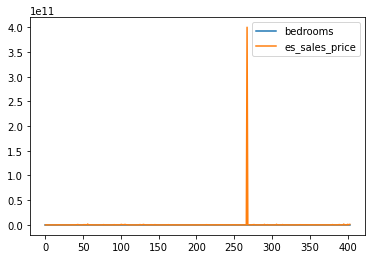

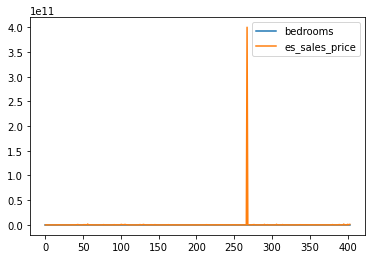

In [285]:
cleaned_data.plot().get_figure()

This plot has shown that there is an outlier in this dataset. Working with this dataset as it is will hugely influence our model performance hence it has to be removed.

In [286]:
cleaned_data.sort_values('es_sales_price', ascending=False)

,Town,location,bedrooms,es_sales_price
267,Lagos,", INA OBASI, Ogudu, Lagos, Nigeria",6.0,4.000000e+11
56,Lagos,", Lekki Phase 1, Lekki, Lagos, Nigeria",5.0,1.661539e+09
395,Banana Island,", Ocean Parade, Banana Island, Nigeria",4.0,1.573846e+09
306,Lagos,", Lekki Phase 1, Lekki, Lagos, Nigeria",5.0,1.200000e+09
400,Oniru,", Oniru, Nigeria",4.0,1.076923e+09
...,...,...,...,...
156,Lagos,", Ewu-Elepe, NEPA Estate, Ikorodu, Lagos, Nigeria",3.0,3.500000e+06
124,Lagos,", Enilololobo, Agege, Lagos, Nigeria",3.0,3.384616e+06
123,Lagos,", Meiran, Lagos, Nigeria",3.0,3.076923e+06
9,Lagos,", adegbose estate solebo ebute, Ipakodo, Ikoro...",3.0,6.153846e+05


In [287]:
cleaned_data['Town'] = cleaned_data['Town'].str.strip(' ')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [288]:
cleaned_data = cleaned_data.drop([267])

Dropped the row that had the outlier and the below plot has shown us a fair distribution of the data in our dataset.

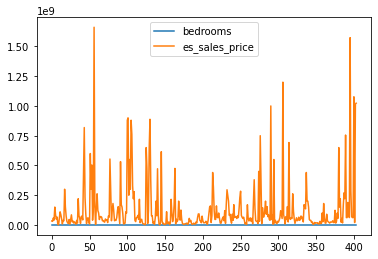

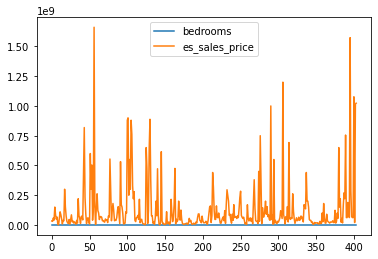

In [289]:
cleaned_data.plot().get_figure()

Using a scatter plot to try to understand the relationship between the number of rooms and the estimated sales price of the appertment

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


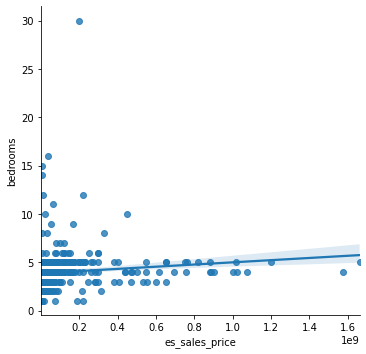

In [290]:
sns.lmplot('es_sales_price', 'bedrooms', data=cleaned_data)

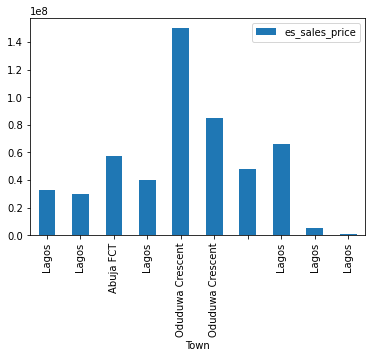

In [291]:
cleaned_data.head(10).plot(x='Town', y='es_sales_price', kind='bar')

Building The Model

In [292]:
msk = np.random.rand(len(cleaned_data)) < 0.7
train = cleaned_data[msk]
test = cleaned_data[~msk]

In [293]:
import matplotlib.pyplot as plt

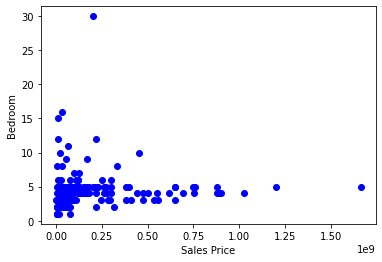

In [294]:
plt.scatter(train.es_sales_price, train.bedrooms,  color='blue')
plt.xlabel("Sales Price")
plt.ylabel("Bedroom")
plt.show()

In [295]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['es_sales_price']])
train_y = np.asanyarray(train[['bedrooms']])
regr.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [296]:
from sklearn.metrics import mean_squared_error

test_x = np.asanyarray(test[['es_sales_price']])
test_y = np.asanyarray(test[['bedrooms']])
test_y_ = regr.predict(test_x)

rmse = np.sqrt(mean_squared_error(test_x, test_y))
rmse

266164501.44002286

In [297]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(test_x, test_y)
mae

122481368.45726496

In [298]:
from sklearn.metrics import r2_score
r2_score(test_x, test_y)

-0.2686459642371044